# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/datasets/arjunbhasin2013/ccdata
then import it in python.

In [219]:
#read the data

data_path = 'CC GENERAL.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


In [220]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [221]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [222]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [223]:
# This will print basic statistics for numerical columns
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [224]:
df.drop(columns=['CUST_ID'],inplace=True)

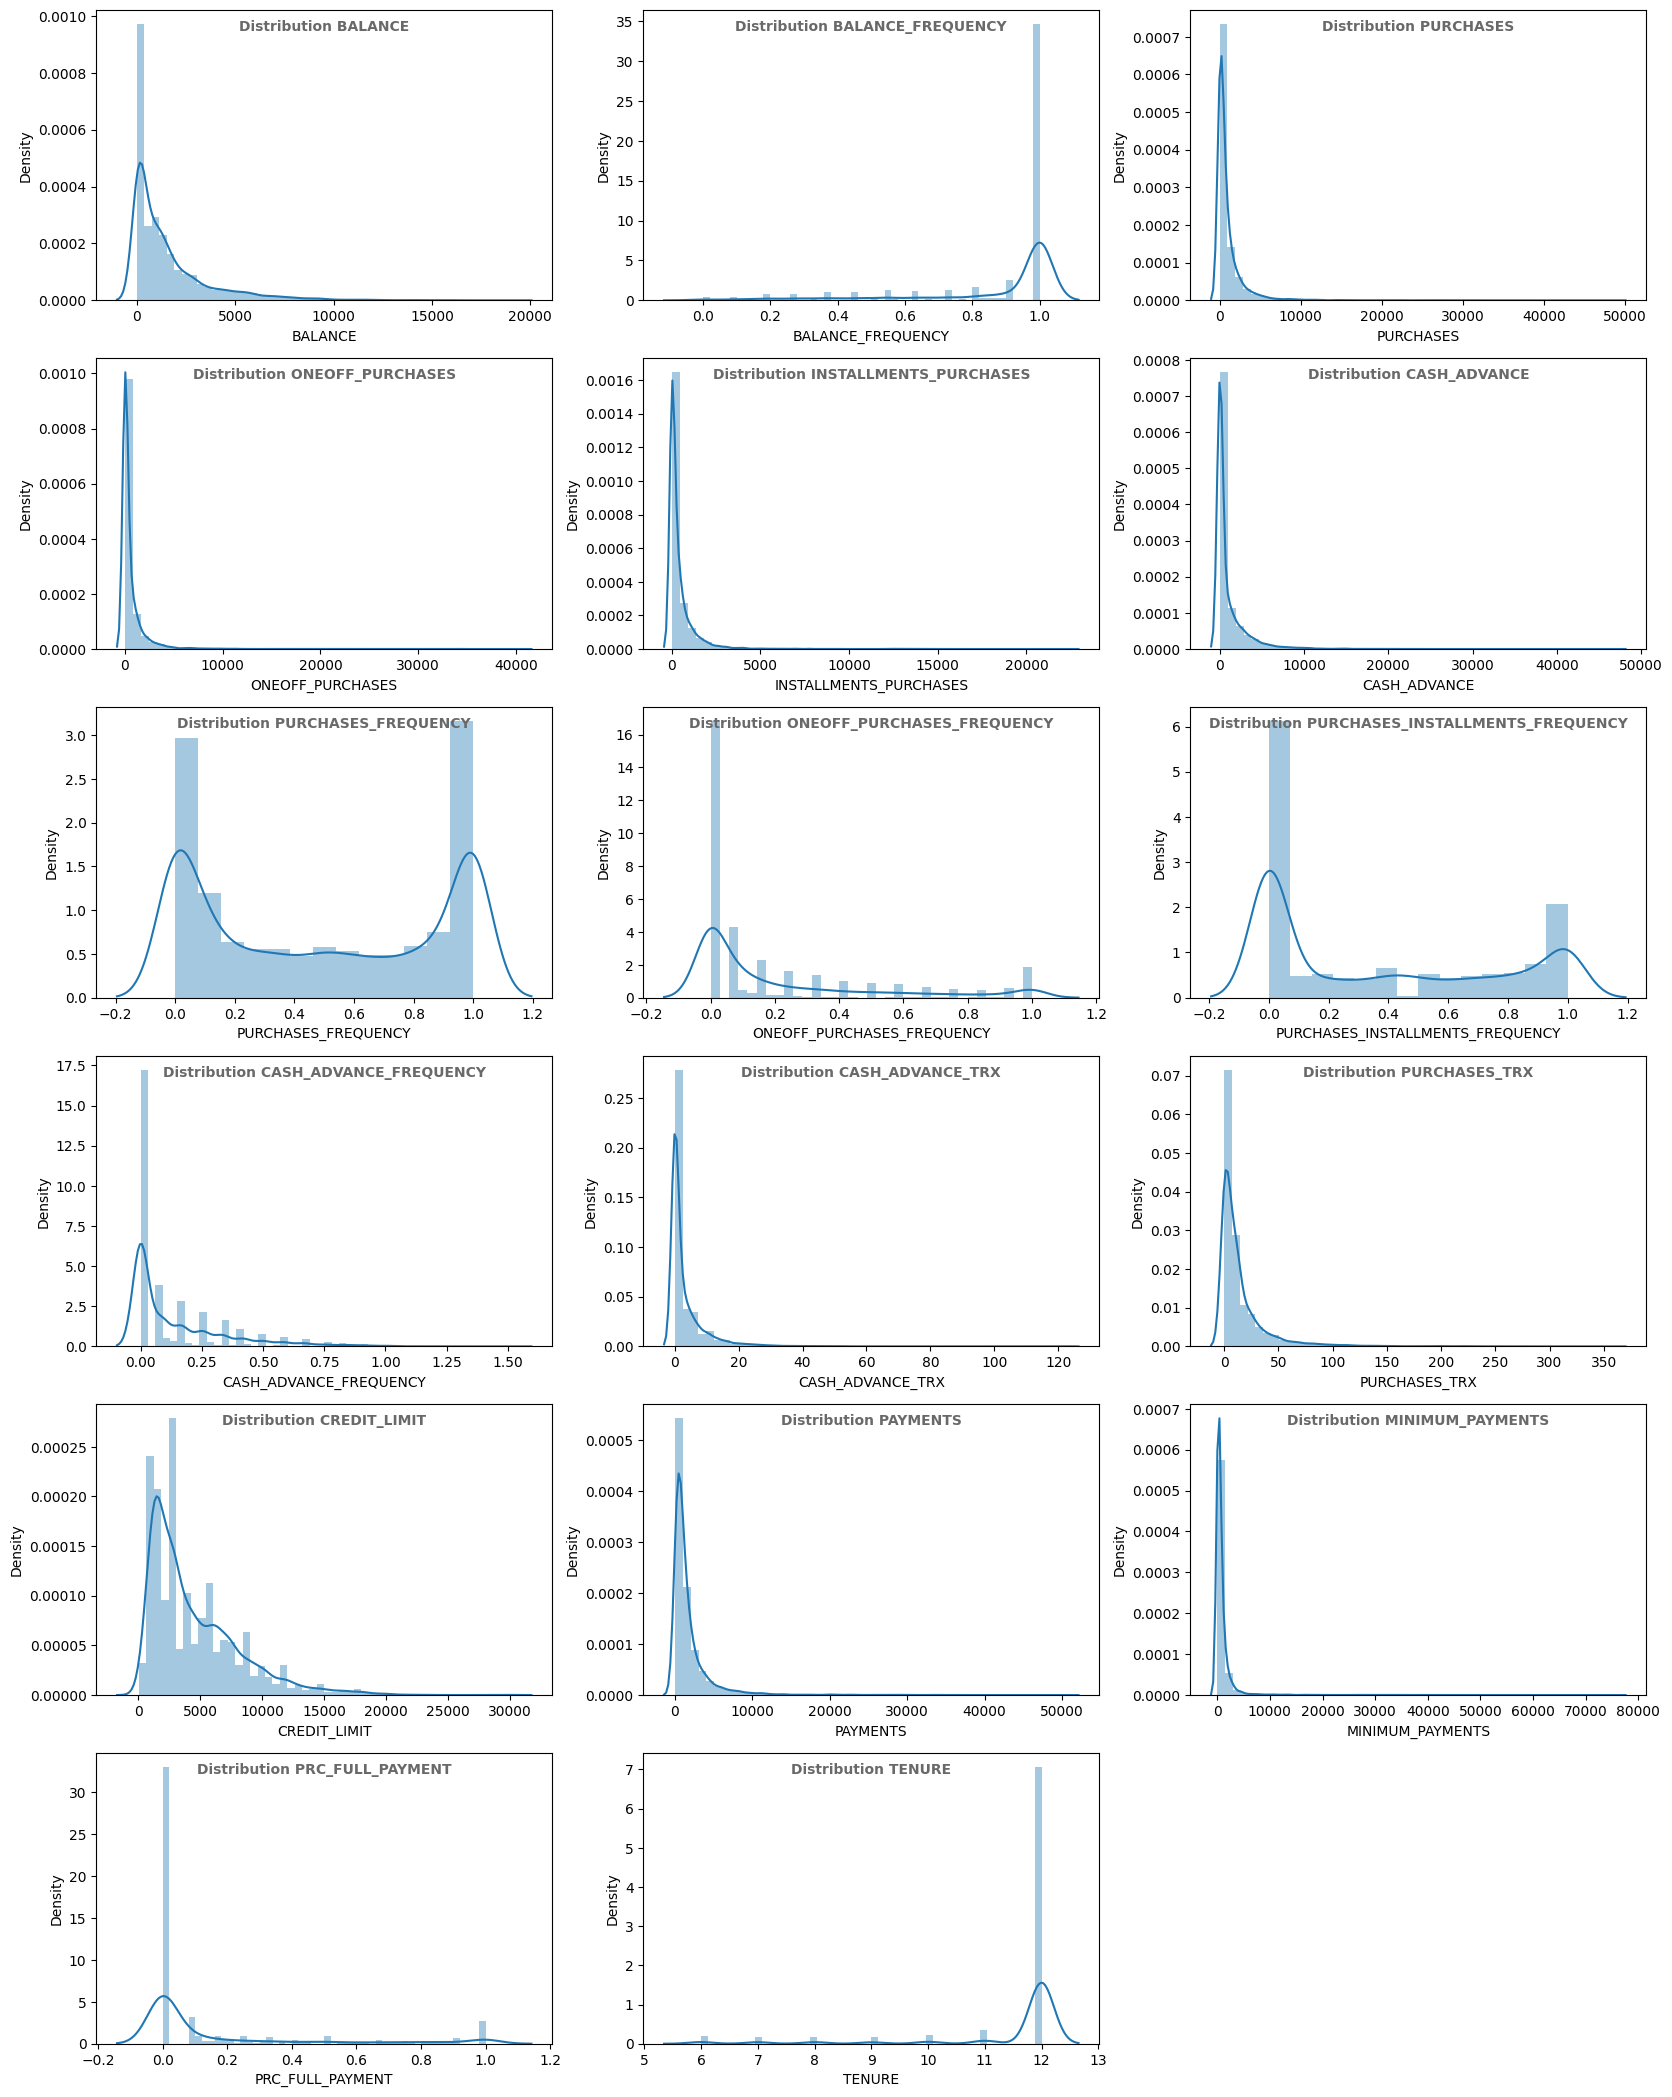

In [225]:
import seaborn as sns
plt.figure(figsize = (20,40))
x = 1
for column in df:
    plt.subplot(9, 3, x)
    sns.distplot(df[column])
    plt.title('Distribution {}'.format(column), fontsize=10, color ='dimgrey', fontweight = 'bold', y=0.90)
    x += 1

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- MINIMUM_PAYMENTS	nulls       <br>
2-  CREDIT_LIMIT nulls          <br>
3- drop id                      <br>

In [226]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**Issues**

In [227]:
df_copy['MINIMUM_PAYMENTS'] = df_copy['MINIMUM_PAYMENTS'].fillna(df_copy['MINIMUM_PAYMENTS'].median())
df_copy["CREDIT_LIMIT"] = df_copy["CREDIT_LIMIT"].fillna(df_copy["CREDIT_LIMIT"].median())

In [228]:
#test 
df_copy.drop_duplicates()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [229]:
round(df_copy.isnull().sum(axis=0)*100/df_copy.shape[0],2)

BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [230]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler
import matplotlib.pyplot as plt


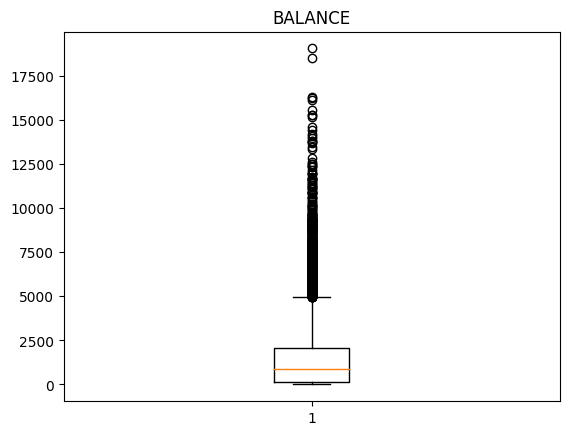

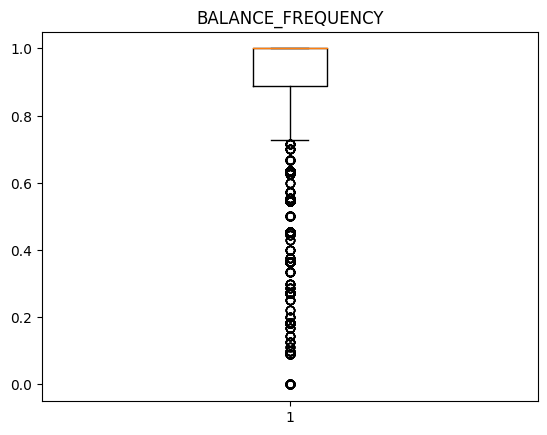

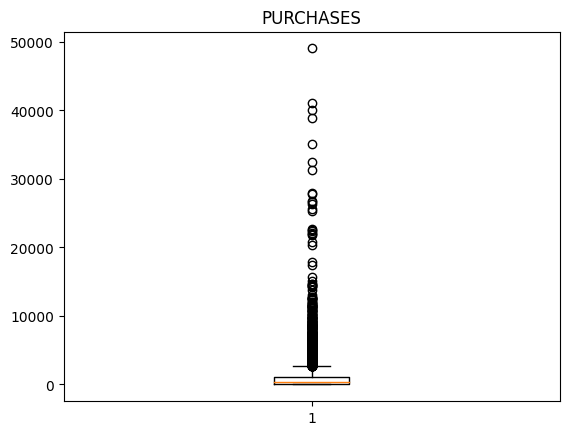

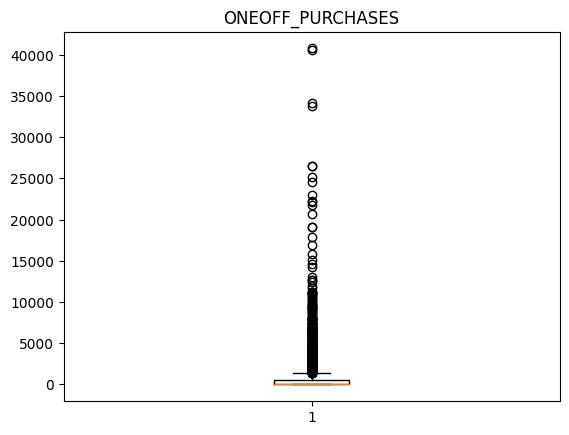

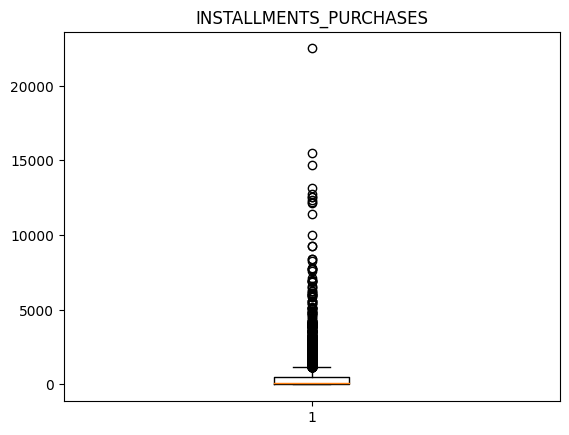

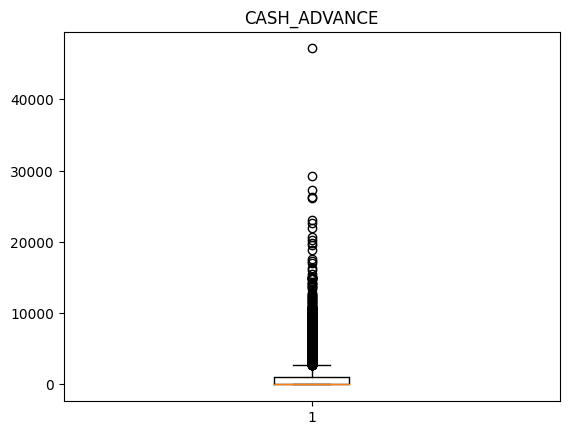

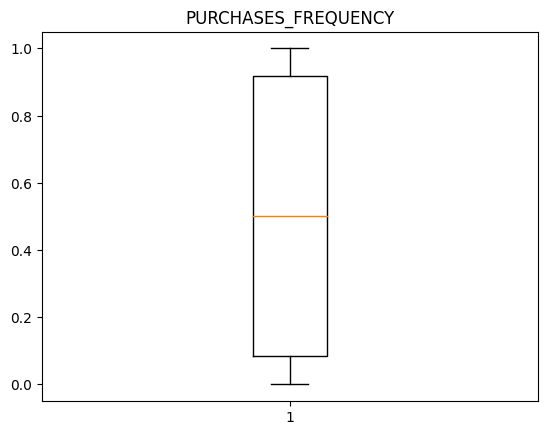

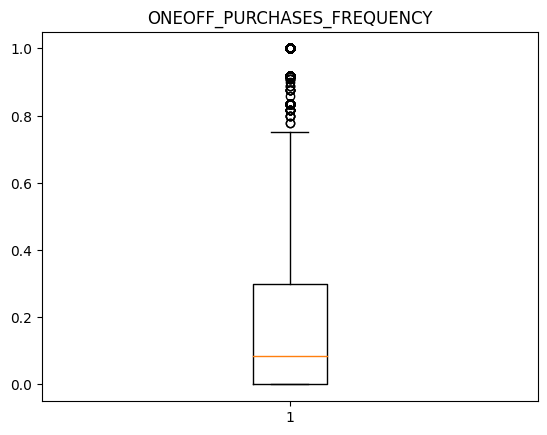

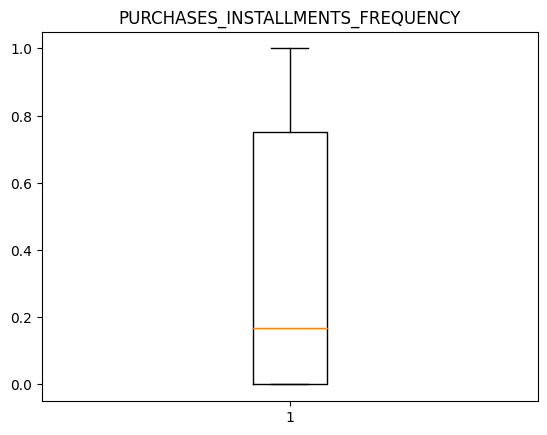

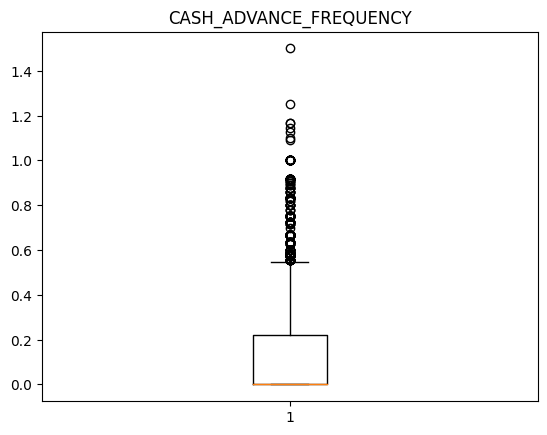

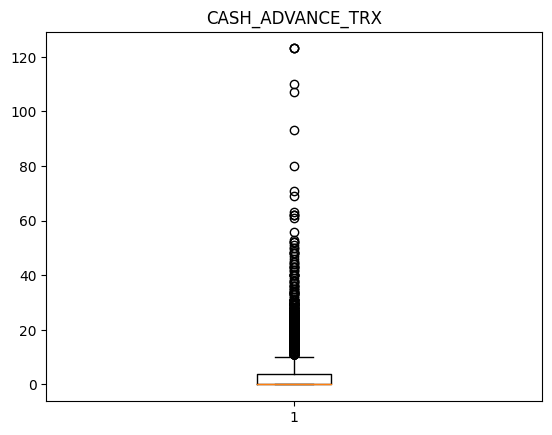

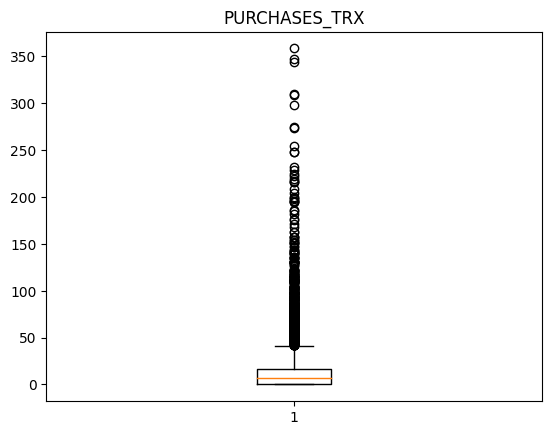

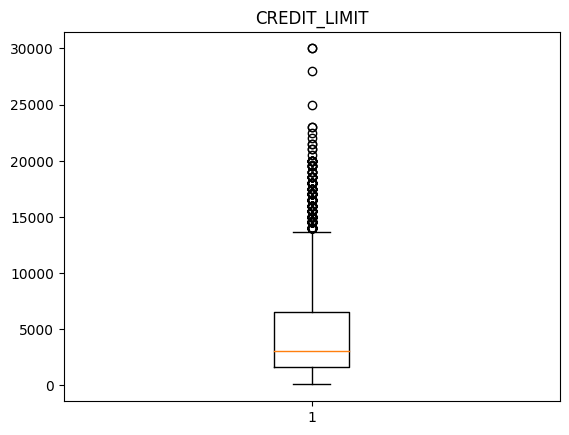

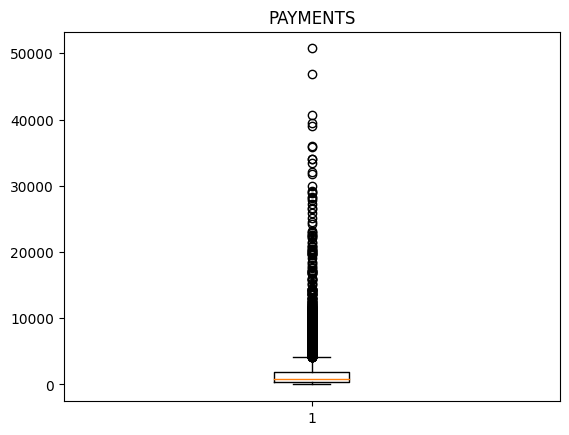

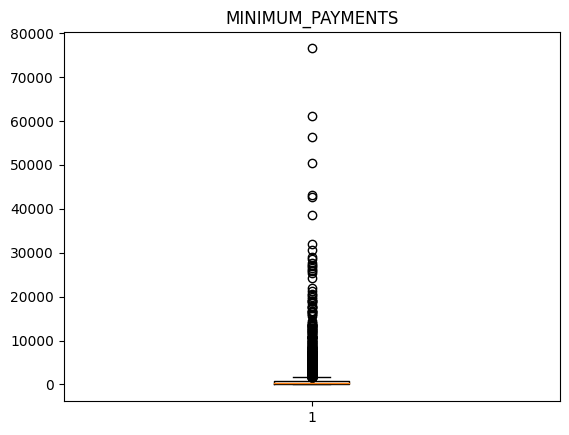

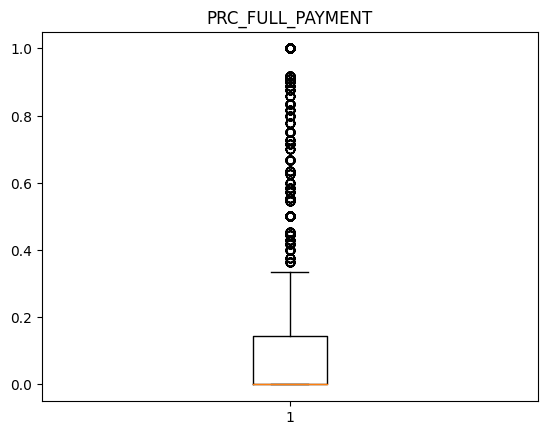

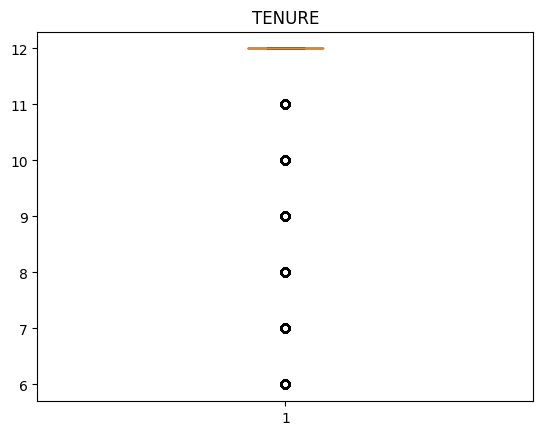

In [231]:
for col in df_copy:
    plt.title(col)
    plt.boxplot(df_copy[col])
    plt.show()

In [232]:
transformer = MinMaxScaler()
mimax=transformer.fit_transform(df_copy)

In [233]:
df=pd.DataFrame(mimax, columns=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'])
df


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.004088,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.006419,0.000640,0.500000,0.0
8946,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.005439,0.004088,0.000000,0.0
8947,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.031720,0.001602,0.001078,0.250000,0.0
8948,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,0.01626,0.000000,0.015025,0.001036,0.000729,0.250000,0.0


In [234]:
df= df.apply(lambda x: np.log(x + 1))

In [251]:
# plt.figure(figsize = (20,40))
# x = 1
# for column in df:
#     plt.subplot(9, 3, x)
#     sns.distplot(df[column])
#     plt.title('Distribution {}'.format(column), fontsize=10, color ='dimgrey', fontweight = 'bold', y=0.90)
#     x += 1

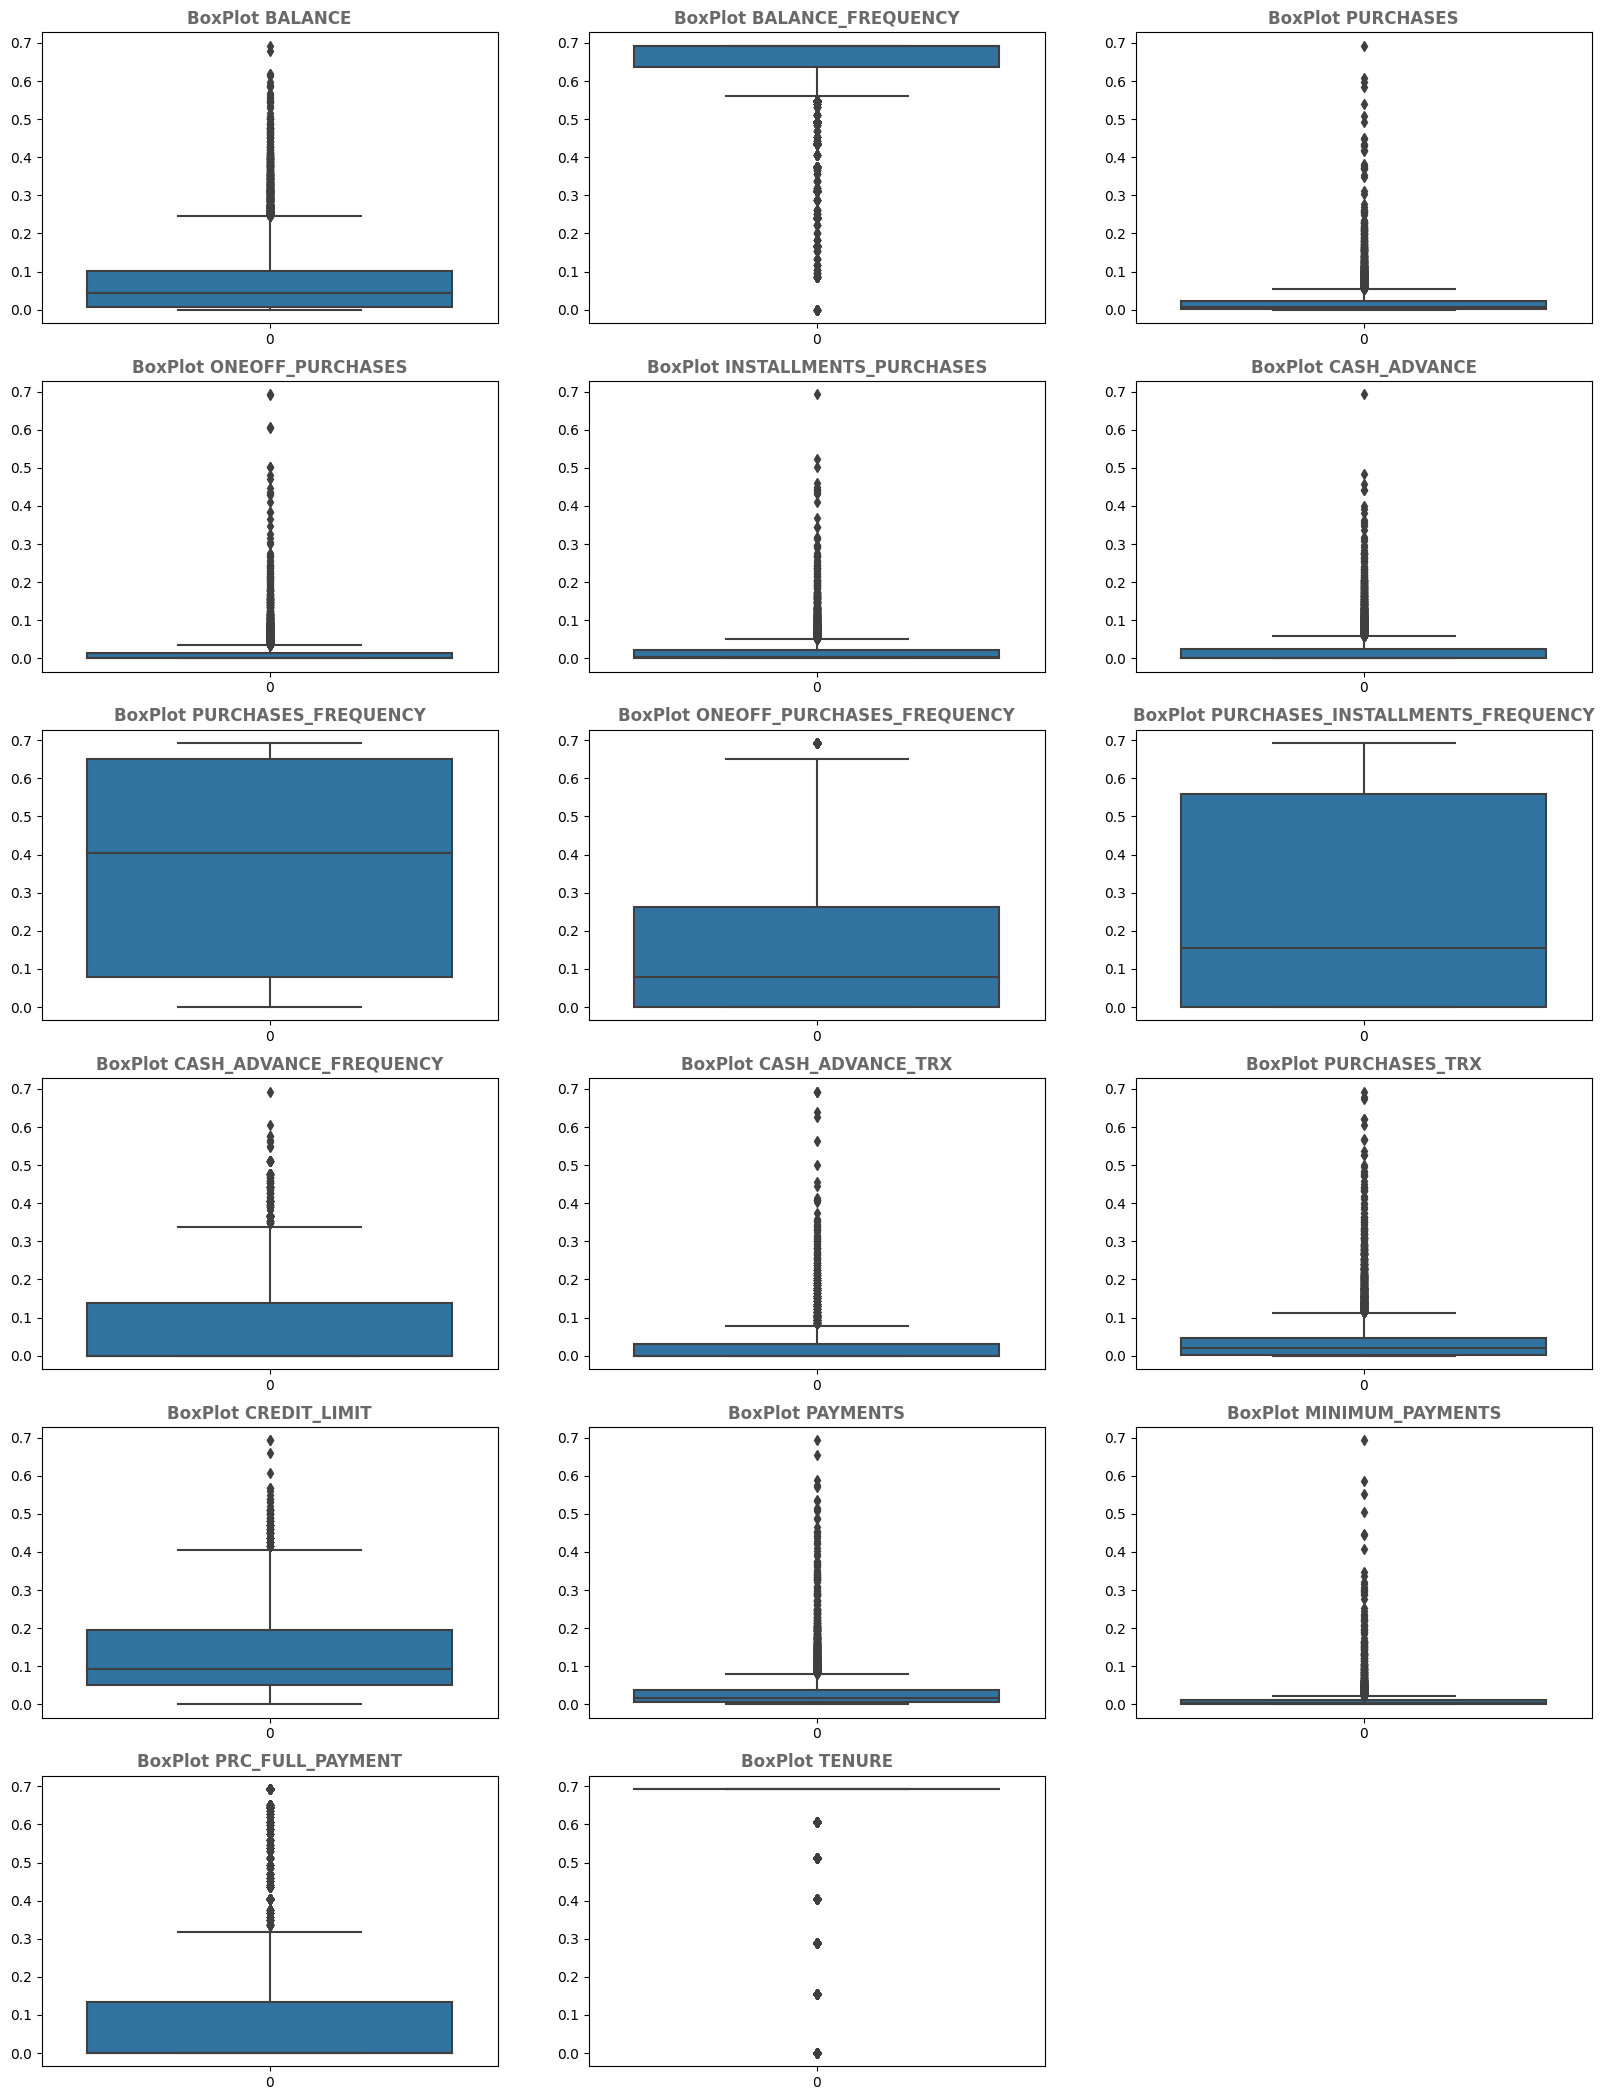

In [236]:
plt.figure(figsize = (20,40))
x = 1
for column in df:
    plt.subplot(9, 3, x)
    sns.boxplot(df[column])
    plt.title('BoxPlot {}'.format(column), fontsize=12, color ='dimgrey', fontweight = 'bold')
    x += 1

## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

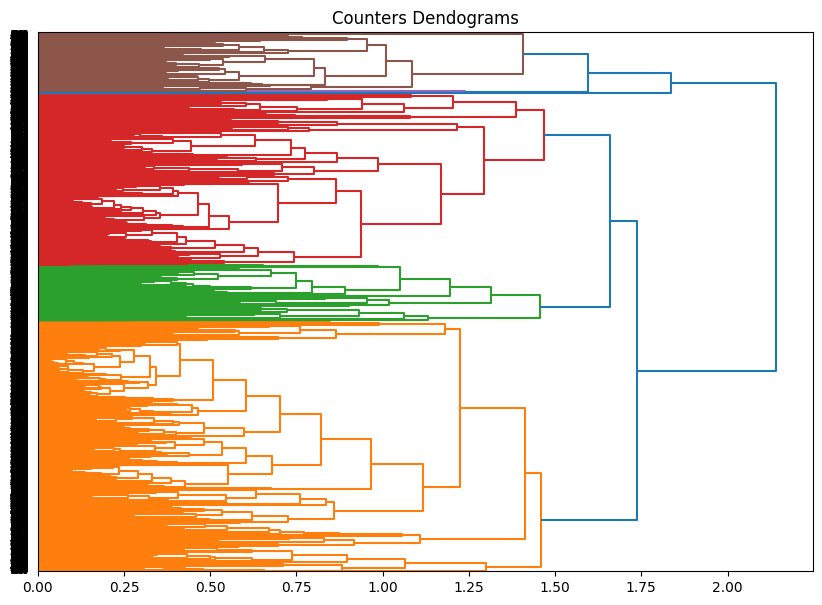

In [237]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df , method="complete",metric="euclidean"),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [271]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from plotnine import *

In [239]:
mins = 3
nn = NearestNeighbors(n_neighbors=mins+1)

nn.fit(df)

distances, neighbors = nn.kneighbors(df)



In [240]:
distances = np.sort(distances[:, mins], axis = 0)

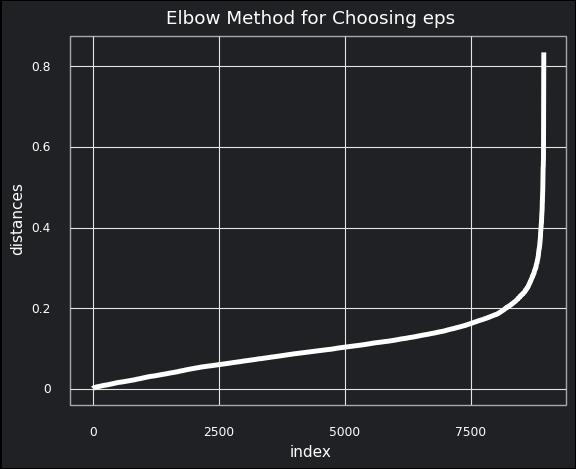

<ggplot: (112347400238)>

In [241]:
distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
 geom_line(color = "white", size = 2) + theme_minimal() +
 labs(title = "Elbow Method for Choosing eps") +
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill = "#202124ff"),
      axis_text = element_text(color = "white"),
      axis_title = element_text(color = "white"),
      plot_title = element_text(color = "white"),
      panel_border = element_line(color = "darkgray"),
      plot_background = element_rect(fill = "#202124ff")
      ))
ggsave(plot=plt, filename='elbow.png', dpi=300)

plt

In [242]:
def drawSSEPlot(df, column_indices, n_clusters=8, max_iter=300, tol=1e-04, init='k-means++', n_init=10, algorithm='auto'):
    import matplotlib.pyplot as plt
    inertia_values = []
    for i in range(1, n_clusters+1):
        km = KMeans(n_clusters=i, max_iter=max_iter, tol=tol, init=init, n_init=n_init, random_state=1, algorithm=algorithm)
        km.fit_predict(df.iloc[:, column_indices])
        inertia_values.append(km.inertia_)
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(range(1, n_clusters+1), inertia_values, color='red')
    plt.xlabel('No. of Clusters', fontsize=15)
    plt.ylabel('SSE / Inertia', fontsize=15)
    plt.title('SSE / Inertia vs No. Of Clusters', fontsize=15)
    plt.grid()
    plt.show()
    

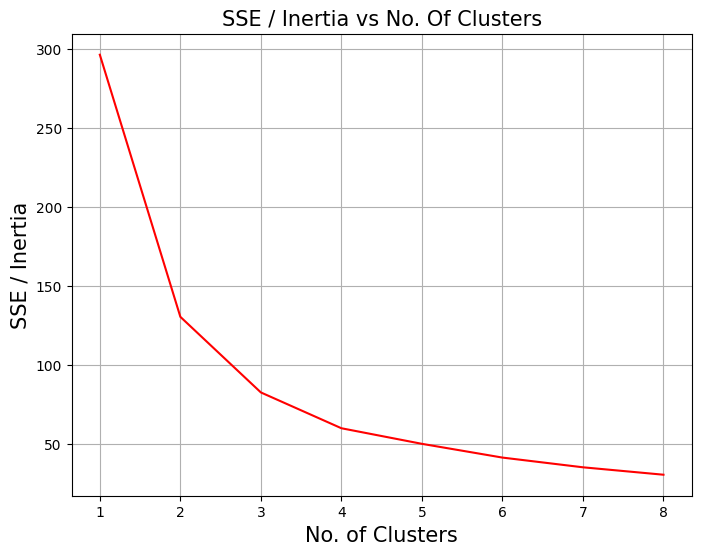

In [243]:
drawSSEPlot(df, [0, 1, 2, 3])

In [252]:
hac1 = AgglomerativeClustering(5,affinity='euclidean',linkage='complete') #best was 2 avarge .4
km1 = KMeans(4)
gm1 = GaussianMixture(2)
db1 = DBSCAN(eps = .2, min_samples = 25)

hac1.fit(df)
km1.fit(df)
gm1.fit(df)
db1.fit(df)
hac = hac1.labels_
km = km1.labels_
gm = gm1.predict(df)
db = db1.labels_


In [253]:
print("DBSCAN Score: ",silhouette_score(df, db))
print("Hierarchical Agglomeretive score: ",silhouette_score(df, hac))
print("Km score: ",silhouette_score(df, km))
print("GMM score: ",silhouette_score(df, gm))

DBSCAN Score:  0.1576659033183868
Hierarchical Agglomeretive score:  0.29062049153130265
Km score:  0.3418620080404892
GMM score:  0.20086955321989972


## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

In [247]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.332968,0.178201,0.165940,0.116063,0.518133,-0.096810,0.076818,-0.079469,0.470710,0.417794,0.143863,0.523891,0.335636,0.438000,-0.353077,0.073340
BALANCE_FREQUENCY,0.332968,1.000000,0.142679,0.112091,0.131113,0.104833,0.211533,0.199116,0.162279,0.193797,0.149031,0.195450,0.095901,0.076724,0.141425,-0.081456,0.103858
PURCHASES,0.178201,0.142679,1.000000,0.909923,0.699512,-0.064135,0.425722,0.535248,0.342699,-0.138232,-0.080701,0.722862,0.360719,0.591066,0.104410,0.190422,0.090448
ONEOFF_PURCHASES,0.165940,0.112091,0.909923,1.000000,0.341752,-0.040609,0.289888,0.572804,0.138371,-0.094590,-0.055001,0.574870,0.327054,0.550969,0.053488,0.137712,0.067460
INSTALLMENTS_PURCHASES,0.116063,0.131113,0.699512,0.341752,1.000000,-0.076703,0.468759,0.227527,0.546942,-0.150481,-0.088409,0.652731,0.252682,0.391423,0.138428,0.196139,0.088683
CASH_ADVANCE,0.518133,0.104833,-0.064135,-0.040609,-0.076703,1.000000,-0.239074,-0.094270,-0.195100,0.656422,0.684196,-0.093156,0.311938,0.449380,0.164879,-0.160901,-0.070547
PURCHASES_FREQUENCY,-0.096810,0.211533,0.425722,0.289888,0.468759,-0.239074,1.000000,0.503478,0.856976,-0.339130,-0.229430,0.600340,0.117516,0.104159,0.000438,0.313555,0.057719
ONEOFF_PURCHASES_FREQUENCY,0.076818,0.199116,0.535248,0.572804,0.227527,-0.094270,0.503478,1.000000,0.143362,-0.119983,-0.073951,0.570257,0.299109,0.257132,-0.026227,0.142205,0.078158
PURCHASES_INSTALLMENTS_FREQUENCY,-0.079469,0.162279,0.342699,0.138371,0.546942,-0.195100,0.856976,0.143362,1.000000,-0.285514,-0.189423,0.559146,0.059688,0.086647,0.027386,0.263038,0.067345
CASH_ADVANCE_FREQUENCY,0.470710,0.193797,-0.138232,-0.094590,-0.150481,0.656422,-0.339130,-0.119983,-0.285514,1.000000,0.828954,-0.153094,0.131111,0.191791,0.122054,-0.265400,-0.130315


In [254]:
def get_redundant_df(df):
    df_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            df_to_drop.add((cols[i], cols[j]))
    return df_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_df(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 10))

Top Absolute Correlations
PURCHASES               ONEOFF_PURCHASES                    0.909923
PURCHASES_FREQUENCY     PURCHASES_INSTALLMENTS_FREQUENCY    0.856976
CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX                    0.828954
PURCHASES               PURCHASES_TRX                       0.722862
                        INSTALLMENTS_PURCHASES              0.699512
CASH_ADVANCE            CASH_ADVANCE_TRX                    0.684196
                        CASH_ADVANCE_FREQUENCY              0.656422
INSTALLMENTS_PURCHASES  PURCHASES_TRX                       0.652731
PURCHASES_FREQUENCY     PURCHASES_TRX                       0.600340
PURCHASES               PAYMENTS                            0.591066
dtype: float64


In [284]:
pca2 = PCA()
pca2.fit(df)
for i in range (df.shape[1]+1):
    pcomps = pca2.transform(df)
    pcomps = pd.DataFrame(pcomps[:,:i+1])
    hac1 =AgglomerativeClustering(affinity='euclidean',linkage='complete',n_clusters=5).fit(pcomps)
    km1 = KMeans(4)
    gm1 = GaussianMixture(2)
    km1.fit(pcomps)
    gm1.fit(pcomps)
    db1.fit(pcomps)
    km = km1.labels_
    gm = gm1.predict(pcomps)
    db = db1.labels_
    hac = hac1.labels_
    print(f"------------------------PCA {i+1}---------------------------------------")
    print("Hierarchical Agglomeretive score: ",silhouette_score(df, hac))
    print("Hierarchical Agglomeretive score: ",silhouette_score(pcomps, hac))
    print("Km score: ",silhouette_score(pcomps, km))
    print("GMM score: ",silhouette_score(pcomps, gm))


------------------------PCA 1---------------------------------------
Hierarchical Agglomeretive score:  0.1824835472779094
Hierarchical Agglomeretive score:  0.5956522132690031
Km score:  0.6333957810855214
GMM score:  0.5723373532884778
------------------------PCA 2---------------------------------------
Hierarchical Agglomeretive score:  0.25182774301357486
Hierarchical Agglomeretive score:  0.45267738238722194
Km score:  0.5187963087507457
GMM score:  0.44904528748358824
------------------------PCA 3---------------------------------------
Hierarchical Agglomeretive score:  0.31706059093743005
Hierarchical Agglomeretive score:  0.4473060450490745
Km score:  0.48701341465939785
GMM score:  0.38462043298213244
------------------------PCA 4---------------------------------------
Hierarchical Agglomeretive score:  0.21896208393470443
Hierarchical Agglomeretive score:  0.26653503486580615
Km score:  0.43392743984393484
GMM score:  0.33596433513880647
------------------------PCA 5---------

In [285]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents)
principalDf

,0,1,2
0,-0.323220,-0.093841,-0.028483
1,-0.448069,-0.030771,0.103489
2,0.177026,0.629372,0.024657
3,-0.411588,0.028117,0.013042
4,-0.397306,0.023703,-0.018655
...,...,...,...
8945,0.446966,-0.361294,0.153722
8946,0.361158,-0.290071,-0.196895
8947,0.281609,-0.316780,0.051046
8948,-0.463830,-0.160378,0.221959


In [289]:
hac1 =AgglomerativeClustering(affinity='euclidean',linkage='complete',n_clusters=5).fit(principalDf)
km1 = KMeans(4)
gm1 = GaussianMixture(2)
km1.fit(principalDf)
gm1.fit(principalDf)
db1.fit(principalDf)
km = km1.labels_
gm = gm1.predict(principalDf)
db = db1.labels_
hac = hac1.labels_
print(f"------------------------PCA {3}---------------------------------------")
print("Db score: ",silhouette_score(principalDf, hac))
print("Hierarchical Agglomeretive score: ",silhouette_score(pcomps, hac))
print("Km score: ",silhouette_score(pcomps, km))
print("GMM score: ",silhouette_score(pcomps, gm))


------------------------PCA 3---------------------------------------
Db score:  0.4473060450459167
Hierarchical Agglomeretive score:  0.31706059093743016
Km score:  0.34206244330371366
GMM score:  0.2887243492352219
